In [3]:
import numpy as np
from numpy import *

In [115]:
#CONSTRUYENDO LA MATRIZ CARACTERIZTICA DEL SISTEMA DE ECUACIONES
#N numero de osciladores
N=100

In [116]:
A=[]
v=np.array([1.,-2.,1.])
vi=np.array([-2.,1.])
vf=np.array([1.,-2.])
zedge=np.zeros(N-2)

for j in range(1,N):
    if j==1:
        a=np.concatenate((vi,zedge))
    else:    
        z1=np.zeros(j-2)
        z2=np.zeros(N-j-1)
        a=np.concatenate((z1,v,z2))
    A.append(a)
    
a=np.concatenate((zedge,vf))    
A.append(a)
#print(A)

In [117]:
omega2,norm=linalg.eig(A)
#las entradas de  norm son las coordenadas de los eigenvectores en la base original:
#La matriz TX con los eigenvectores como renglones covierte un vector eX en la eigenbase eX a la base X: 
#xb_i=e_ij*xe_j
Tx= matrix(norm)
# La inversa de TeX=TX^-1 convierte a un vector en la base fisica a la base normal
Tex= Tx.I

omega=np.sqrt(-omega2)

In [119]:
#CONDICIONES DE FRONTERA C1:¿ Que modos estan excitados con estas condiciones ?
yini1= [1,-1]+[0 for i in range(2,N)]
# Que combinacion lineal de los modos me da este vector en espacio fisico?
Modes1= linalg.solve(Tex,yini1)
#print(yini1)
#print(Modes1)

In [120]:
#CONDICIONES DE FRONTERA C2: EL PRIMER MODO ESTA EXCITADO INICIALMENTE
d=np.identity(N)[0]
yini2 = linalg.solve(Tx,d)
Modes2= linalg.solve(Tex,yini2)
#print(Modes2)
#print(yini2)

In [126]:
#ENERGIA DE CADA MODO INICIALMENTE
E01=[0.5*omega[i]**2*Modes1[i]**2 for i in range(0,N)]
E02=[0.5*omega[i]**2*Modes2[i]**2 for i in range(0,N)]

import matplotlib.pyplot as plt

Nt=1000
tf=20
t=linspace(0,tf,Nt)

#ENERGIA COMO FUNCION DEL TIEMPO
plt.subplot(211)
for i in range(0,N): 
    plt.plot(t, E01[i]*np.cos(omega[i]*t)**2)
    plt.title('Condiciones 1')
    plt.ylabel('posicion normal', fontsize=10)  
    
plt.subplot(212)
for i in range(0,N): 
    plt.plot(t, E02[i]*np.cos(omega[i]*t)**2)
    plt.ylabel('posicion normal', fontsize=10)  
    plt.title('Condiciones 2')
    
plt.xlabel('tiempo', fontsize=10)  
plt.legend()    


/home/lana/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


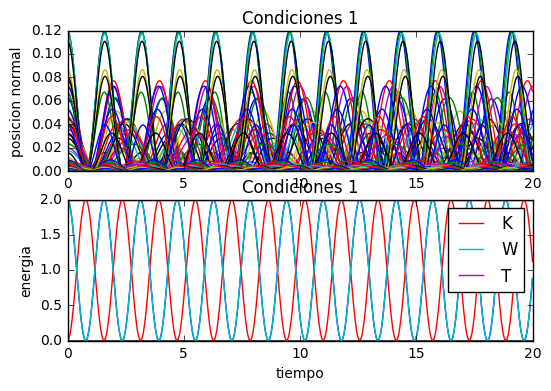

In [127]:
#ENRGIA TOTAL 
def W(x):
    W=[E02[i]*np.cos(omega[i]*x)**2 for i in range(0,N)]
    Wtot=sum(W)
    return Wtot

def K(x):
    K=[E02[i]*np.sin(omega[i]*x)**2 for i in range(0,N)]
    Ktot=sum(K)
    return Ktot

def T(x):
    Tot=sum(E02)
    return Tot

x = np.linspace(0,20,400)
Wx=np.vectorize(W)
Kx=np.vectorize(K)
Tx=np.vectorize(T)



plt.plot(x,Kx(x),label='K')
plt.plot(x,Wx(x),label='W')
plt.plot(x,Tx(x),label='T')
plt.ylabel('energia', fontsize=10)  
plt.title('Condiciones 1')    
plt.legend(loc = 'upper center')   
plt.xlabel('tiempo', fontsize=10)  
plt.legend()    
plt.show()


In [128]:

from scipy.integrate import odeint

In [129]:

def SystemNL(cini,t):
    
    #Sistema formado por la matriz en bloques
    dX=np.zeros(N)
    dY=np.zeros(N)
    X=cini[:N]
    Y=cini[N:]
    
    a=0.05
    pwd=3

    for i in range(0,N-1):
    #Condiciones iniciales:
    #Posiciones
        
    #Derivadas
        dY[i]=X[i+1]+X[i-1]-2.0*X[i]+a*(X[i-1]-X[i])**pwd+a*(X[i+1]-X[i])**pwd
        dX[i]=Y[i]
        
    dY[0]=X[1]-2.0*X[0]+a*(X[1]-X[0])**pwd
    dY[N-1]=X[N-2]-2.0*X[N-1]+a*(X[N-2]-X[N-1])**pwd
    dX[N-1]=Y[N-1]
    
    dZ = np.append(dX,dY)
    
    return dZ

def SystemL(cini,t):
    
    #Sistema formado por la matriz en bloques
    dX=np.zeros(N)
    dY=np.zeros(N)
    X=cini[:N]
    Y=cini[N:]
    
    

    for i in range(0,N-1):
    #Condiciones iniciales:
    #Posiciones
        
    #Derivadas
        dY[i]=X[i+1]+X[i-1]-2.0*X[i]
        dX[i]=Y[i]
        
    dY[0]=X[1]-2.0*X[0]
    dY[N-1]=X[N-2]-2.0*X[N-1]
    dX[N-1]=Y[N-1]
    
    dZ = np.append(dX,dY)
    
    return dZ

In [131]:
#Usando C1
Cini1=yini1+[0 for i in range(0,N)]
Cini2=yini2+[0 for i in range(0,N)]
SolL=odeint(SystemL,Cini1,t)
SolNL=odeint(SystemNL,Cini1,t)
#np.shape(SolL)
#Velocidades y posiciones de las particulas en el sistema lineal
x_l=[SolL[:,i] for i in range(0,N)]
v_l=[np.array(SolL[:,i]) for i in range(N,2*N)]
#Velocidades y posiciones de las particulas en el sistema no-lineal
x_nl=[np.array(SolNL[:,i]) for i in range(0,N)]
v_nl=[np.array(SolNL[:,i]) for i in range(N,2*N)]

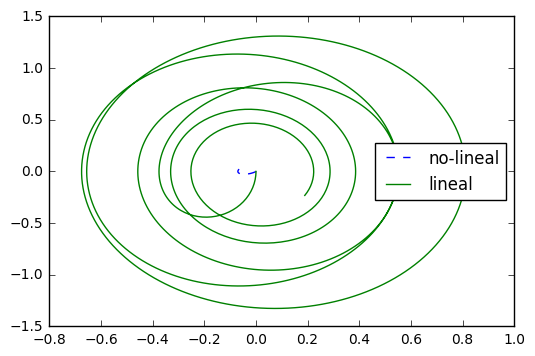

In [133]:
plt.figure(1)
plt.plot(x_nl[20], v_nl[20], '--', label='no-lineal')
plt.plot(x_l[2], v_l[2],  label='lineal')
#plt.plot(x_nl[2], v_nl[2], label='Quadratic')
plt.legend(loc = 'right')  
plt.show()

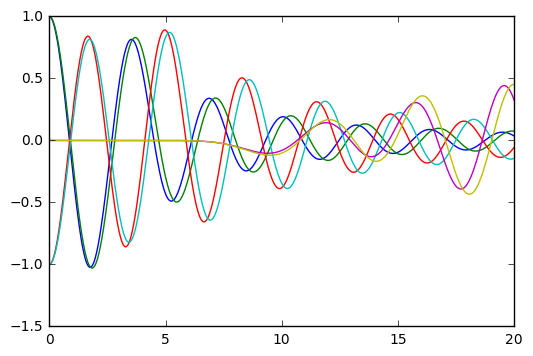

In [135]:
#SOLUCION PARA LAS POSICIONES DE LAS 3 PARTICULAS
plt.figure(1)
plt.plot(t,x_nl[0],t,x_l[0], label='particula 1')
plt.plot(t,x_nl[1],t,x_l[1], label='particula 2')
plt.plot(t,x_nl[10],t,x_l[10], label='particula 3')
plt.show()

In [136]:
#En coordenadas normales todo toma mas sentido...
#Pasando a la base normal
Tex=np.array(Tex)

#normL=sum(Tex[i]*x_l[i] for i in range(0,N))
normL= [dot(Tex,SolL[itime,:N]) for itime in range(0, Nt)] 
normNL= [dot(Tex,SolNL[itime,:N]) for itime in range(0, Nt)] 

vnormL= [dot(Tex,SolL[itime,N:]) for itime in range(0, Nt)] 
vnormNL= [dot(Tex,SolNL[itime,N:]) for itime in range(0, Nt)] 

#x=linspace(0,20,1000)
#plt.plot(x,n_l[0](x))
normL=np.transpose(normL)
normNL=np.transpose(normNL)
vnormL=np.transpose(vnormL)
vnormNL=np.transpose(vnormNL)

shape(normL)

(100, 1000)

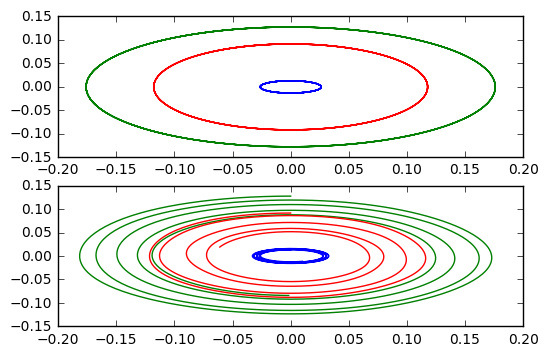

In [143]:
take_modes=[0,10,20]
plt.subplot(2,1,1)
plt.plot(vnormL[take_modes[0]],normL[take_modes[0]],vnormL[take_modes[1]],normL[take_modes[1]],vnormL[take_modes[2]],normL[take_modes[2]])
plt.subplot(2,1,2)
plt.plot(vnormNL[take_modes[0]],normNL[take_modes[0]],vnormNL[take_modes[1]],normNL[take_modes[1]],vnormNL[take_modes[2]],normNL[take_modes[2]])
plt.show()

In [145]:
def energy(x,v):
    return 0.5*dot(omega**2,x**2)+0.5*v**2

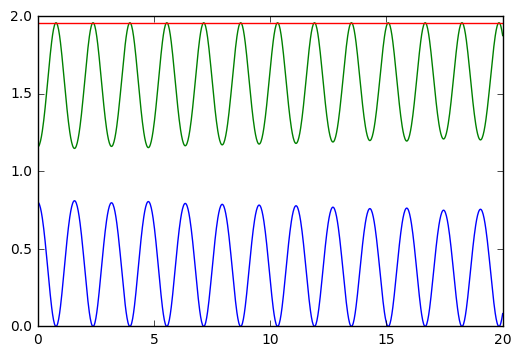

In [106]:
plt.subplot(2,1,1)
plt.plot(t,energy(normL[take_modes[0]],vnormL[take_modes[0]]),energy(vnormL[take_modes[1]],normL[take_modes[1]],vnormL[take_modes[2]],normL[take_modes[2]])
plt.subplot(2,1,2)
plt.plot(vnormNL[take_modes[0]],normNL[take_modes[0]],vnormNL[take_modes[1]],normNL[take_modes[1]],vnormNL[take_modes[2]],normNL[take_modes[2]])
plt.show()

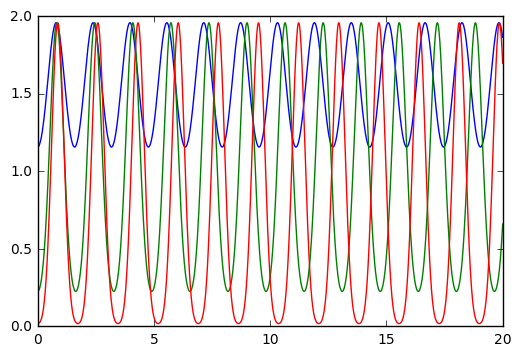

In [110]:
plt.plot(t,Wx(normL[0]),t,Wx(normL[1]),t,Wx(normL[2]))
plt.show()